# 인공 신경망

In [ ]:
# 사이킷런 1.1.0 버전에서 SGDClassifier의 loss 매개변수 중 
# 로지스틱 손실을 의미하는 'log'가 'log_loss'로 바뀐다는 경고가 발생합니다.
# 경고를 방지하기 위해 주피터 노트북의 코드를 'log_loss'로 변경하므로
# 사이킷런 1.1.0 버전 이상이 설치되어야 합니다.
!pip install -U scikit-learn

import sklearn
assert sklearn.__version__ >= "1.1.0"

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


AssertionError: ignored

In [ ]:
import sklearn

## 패션 MNIST

In [ ]:
import tensorflow as tf
from tensorflow import keras

(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()

In [ ]:
print(train_input.shape, train_target.shape)

(60000, 28, 28) (60000,)


In [ ]:
print(test_input.shape, test_target.shape)

(10000, 28, 28) (10000,)


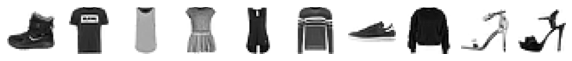

In [ ]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, 10, figsize=(10,10))
for i in range(10):
    axs[i].imshow(train_input[i], cmap='gray_r')
    axs[i].axis('off')
plt.show()

In [ ]:
print([train_target[i] for i in range(10)])

[9, 0, 0, 3, 0, 2, 7, 2, 5, 5]


In [ ]:
import numpy as np

print(np.unique(train_target, return_counts=True))

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8), array([6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000]))


## 로지스틱 회귀로 패션 아이템 분류하기

In [ ]:
# 정규화
# 28x28 사이즈의 이미지 크기 지정
train_scaled = train_input / 255.0
train_scaled = train_scaled.reshape(-1, 28*28)

In [ ]:
print(train_scaled.shape)

(60000, 784)


In [ ]:
from sklearn.model_selection import cross_validate
from sklearn.linear_model import SGDClassifier

# 사이킷런 1.1.0 버전 이하일 경우 'log_loss'를 'log'로 바꾸어 주세요.
sc = SGDClassifier(loss='log', max_iter=5, random_state=42)

scores = cross_validate(sc, train_scaled, train_target, n_jobs=-1)
print(np.mean(scores['test_score']))

0.8195666666666668


In [ ]:
sc = SGDClassifier(loss='log', max_iter=10, random_state=42)

scores = cross_validate(sc, train_scaled, train_target, n_jobs=-1)
print(np.mean(scores['test_score']))

0.8313333333333333


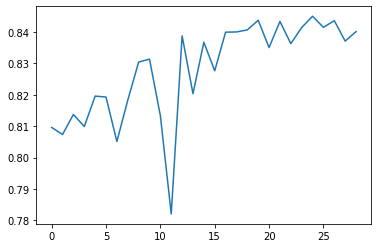

In [ ]:
score = []
for i in range(1,30):
  sc = SGDClassifier(loss='log', max_iter=i, random_state=42)
  scores = cross_validate(sc, train_scaled, train_target, n_jobs=-1)
  score.append(np.mean(scores['test_score']))

plt.plot(score)
plt.show()

## 인공신경망

### 텐서플로와 케라스

In [26]:
import tensorflow as tf

In [27]:
from tensorflow import keras

## 인공신경망으로 모델 만들기

In [28]:
from sklearn.model_selection import train_test_split

train_scaled, val_scaled, train_target, val_target = train_test_split(
    train_scaled, train_target, test_size=0.2, random_state=42)

In [29]:
print(train_scaled.shape, train_target.shape)

(38400, 784) (38400,)


In [30]:
print(val_scaled.shape, val_target.shape)

(9600, 784) (9600,)


In [31]:
dense = keras.layers.Dense(10, activation='softmax', input_shape=(784,))

In [32]:
model = keras.Sequential(dense)

## 인공신경망으로 패션 아이템 분류하기

In [33]:
# sparse = 최소
# One-hot Encoding을 준비했다면 categorical_crossentropy로 지정
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')

In [34]:
print(train_target[:10])

[9 4 9 0 4 9 3 6 4 7]


In [35]:
model.fit(train_scaled, train_target, epochs=5)

Epoch 1/5
1200/1200 [==============================] - 8s 5ms/step - loss: 0.6349 - accuracy: 0.7850
Epoch 2/5
1200/1200 [==============================] - 4s 4ms/step - loss: 0.4911 - accuracy: 0.8344
Epoch 3/5
1200/1200 [==============================] - 2s 2ms/step - loss: 0.4657 - accuracy: 0.8441
Epoch 4/5
1200/1200 [==============================] - 2s 2ms/step - loss: 0.4526 - accuracy: 0.8490
Epoch 5/5
1200/1200 [==============================] - 2s 2ms/step - loss: 0.4413 - accuracy: 0.8535


In [36]:
model.evaluate(val_scaled, val_target)

300/300 [==============================] - 1s 1ms/step - loss: 0.4340 - accuracy: 0.8562


[0.4339633285999298, 0.856249988079071]